<a href="https://colab.research.google.com/github/thisisharrison/titanic/blob/main/Titanic_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/PrefaceCoding/M2L6

Cloning into 'M2L6'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# pandas - package with data types desinged to make working with "relational" and "labeled" data easy
# a data analysis/manipulation tool 
# tabular data - think excel spreadsheet 
# ordered and unordered data 
# row and column data 

In [ ]:
# matplotlib - plotting library
# creating static, animated and interactive visualization

In [ ]:
# seaborn - visualizaation library based on matplotlib
# draws informative statistical graphics 

In [ ]:
# numpy - numerical computing tools for python

In [3]:
titanic = pd.read_csv("M2L6/titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Exploratory Data Analysis
# performing initial *investigation* on data
# summary of statistics and graphical representation
# objective: discover patterns, spot anomalies, test hypothesis, check assumption

# Data Cleaning -> no missing value
# Data Engineering -> creating data based on existing data
# Machine Learning -> based on Features, what would result be

In [11]:
# Returns the first n rows for the object based on position.
# It is useful for quickly testing if your object has the right type of data in it.
# For negative values of n, this function returns all rows except the last n rows, 
# equivalent to df[:-n].

titanic.head() # 5
titanic.head(2) # 2
titanic.tail() # 890
titanic.head(-2) # 888

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [13]:
# Print a concise summary of a DataFrame.
# prints information about a DataFrame including the index dtype and column dtypes, 
# non-null values and memory usage.

# dtype
# non-null
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# datasets are rarely perfect
# first step to proper analysis is cleaning and organizing the data
# is missing data bad data? 
  # we want to explore if age has any correlation to survival
  # we may use machine learning model that do not support data with missing values

In [14]:
# true for NaN (not a number) values
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# sum of all true
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

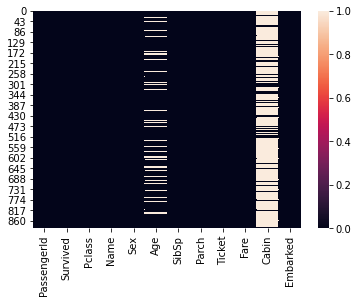

In [16]:
# visualize the missing data visually
sns.heatmap(titanic.isnull())

**How old was the oldest and youngest passenger?**

In [ ]:
titanic["Age"].max()

80.0

In [ ]:
titanic["Age"].min()

0.42

**What was the average age of all the passengers?**

*.mean()*
*   Returns the mean of the values for the requested axis.

In [ ]:
titanic["Age"].mean()

29.69911764705882

**How many passengers survived?**

In [ ]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# normalize=True returns the relative frequencies of the unique values - percentages!
titanic["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

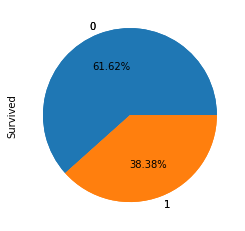

In [21]:
titanic["Survived"].value_counts(normalize=True).plot.pie()
# same as above normalize = True
titanic["Survived"].value_counts().plot.pie(autopct="%.2f%%")

**Explore whether "Sex" or "Pclass" gave a passenger a better chance of survival.**

In [ ]:
# how many did not survive
titanic[titanic["Survived"] == 0]["Sex"].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [ ]:
# how many did survive
titanic[titanic["Survived"] == 1]["Sex"].value_counts()

female    233
male      109
Name: Sex, dtype: int64

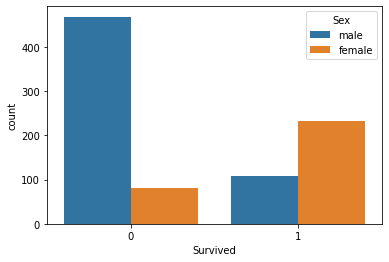

In [22]:
# can we visualize this?
sns.countplot(x="Survived", data=titanic, hue="Sex")

In [ ]:
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
titanic[titanic["Pclass"] == 1]["Survived"].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [ ]:
titanic[titanic["Pclass"] == 2]["Survived"].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [ ]:
titanic[titanic["Pclass"] == 3]["Survived"].value_counts()

0    372
1    119
Name: Survived, dtype: int64

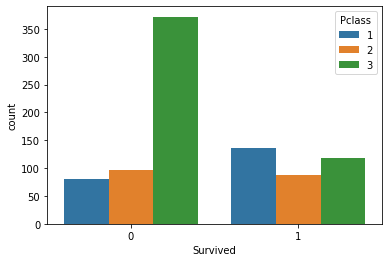

In [23]:
# can we visualize this?
sns.countplot(x="Survived", data=titanic, hue="Pclass")

In [27]:
# how about Sex + PClass together?
# we can groupby sex
# only column that makes sense here is Survived (0, 1), sum gives us total survived
titanic.groupby("Sex").sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,7286.00,218,204,13966.6628
male,262043,109,1379,13919.17,248,136,14727.2865


In [30]:
# we can groupby multiple columns 
titanic.groupby(["Sex","Pclass","Survived"]).count()
# we can just use one of the columns that have no empty values
titanic.groupby(["Sex","Pclass","Survived"]).count()["PassengerId"]

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: PassengerId, dtype: int64